## Titanic - Analysis and Predict 
This is my first Notebook in Kaggle, then if you find any error tell me, please.

In [1]:
# Manipulation of vectors library
import numpy as np
# Manipulation of data library
import pandas as pd
#Ploting graphs library
import matplotlib.pyplot as plt
import seaborn as sns
# Manipulation of the system library
import os

Let's see the files on kaggle/input/titanic folder.

In [6]:
! cd && dir

C:\Users\Rafael\Kaggle\Titanic
 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ 28F5-7489

 Pasta de C:\Users\Rafael\Kaggle\Titanic

13/01/2021  10:18    <DIR>          .
13/01/2021  10:18    <DIR>          ..
13/01/2021  10:18    <DIR>          .ipynb_checkpoints
11/12/2019  02:17             3.258 gender_submission.csv
11/12/2019  02:17            28.629 test.csv
13/01/2021  09:57           522.020 titanic-analysis-and-predict.ipynb
11/12/2019  02:17            61.194 train.csv
               4 arquivo(s)        615.101 bytes
               3 pasta(s)   86.159.032.320 bytes dispon¡veis


Now, define the train and test variables from system folder.

In [22]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
from sqlalchemy import create_engine
engine = create_engine("sqlite:///mydb.db")  # relative path to db

In [23]:
df_train.to_sql("my_table", engine)

In [20]:
engine.execute("SELECT * FROM users").fetchall()

[(1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 7.25, None, 'S'),
 (2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C'),
 (3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.925, None, 'S'),
 (4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S'),
 (5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', 8.05, None, 'S'),
 (6, 0, 3, 'Moran, Mr. James', 'male', None, 0, 0, '330877', 8.4583, None, 'Q'),
 (7, 0, 1, 'McCarthy, Mr. Timothy J', 'male', 54.0, 0, 0, '17463', 51.8625, 'E46', 'S'),
 (8, 0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 21.075, None, 'S'),
 (9, 1, 3, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', 11.1333, None, 'S'),
 (10, 1, 2, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0, 1, 0, '237736', 30.0708, None, 'C'),
 (11, 1,

Some data of train DataFrame.

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describing Data

Let's begin with some statistics.

In [5]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Realize that there's some missing values on the data, we have to handle with them. Also, 38.38% of passengers survived, so let's compare the survival rate with the others columns.

In [6]:
df_train.groupby('Pclass').mean()['Survived']*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Notice that, the survival rate grow with de class of the passager. 

Moreover, the data have some missing data values e we'll handle with them.

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The correlation is

In [8]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


But, this is hard to vizualize, then, let's see this using an heatmap plot from seaborn.

## Ploting Data

Heatmap of correlation

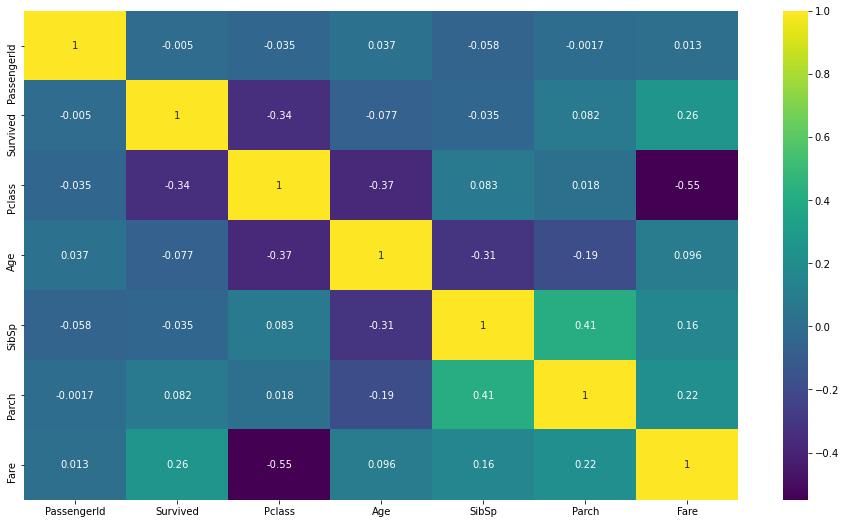

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')
plt.show()

With this correlation map maybe:


* Fare is inverse of Pclass, then passagers of low class paid less for the trip;
* SibSp is proportional to Parch, this is expected;
* Age is inversely proportional to class, maybe the upper class is more elderly than the lower, we'll se it below;
* Pclass is inverse of Survived, this is alredy expected once the class 1 have 62.96% rate of survived;
* Fare is proportional to Survived, maybe who paid more for the trip belong to class 1, thus have more chances to survive;

  Let's response these questions.

* Fare is inverse of Pclass, then passagers of low class paid less for the trip;


YES, as you can see, classes 2 and 3 paid less for the trip. Moreover, for the class 1 there's some peoples that paid over than 200.

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


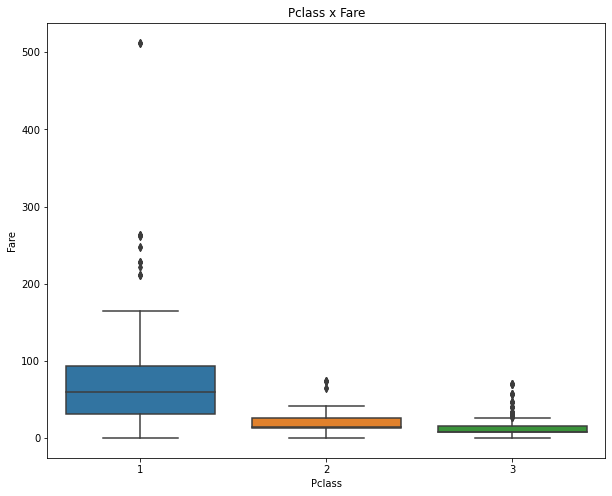

In [10]:
print(df_train.groupby('Pclass').mean()['Fare'])
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Fare', data=df_train)
plt.title('Pclass x Fare')
plt.show()

* SibSp is proportional to Parch, this is expected;


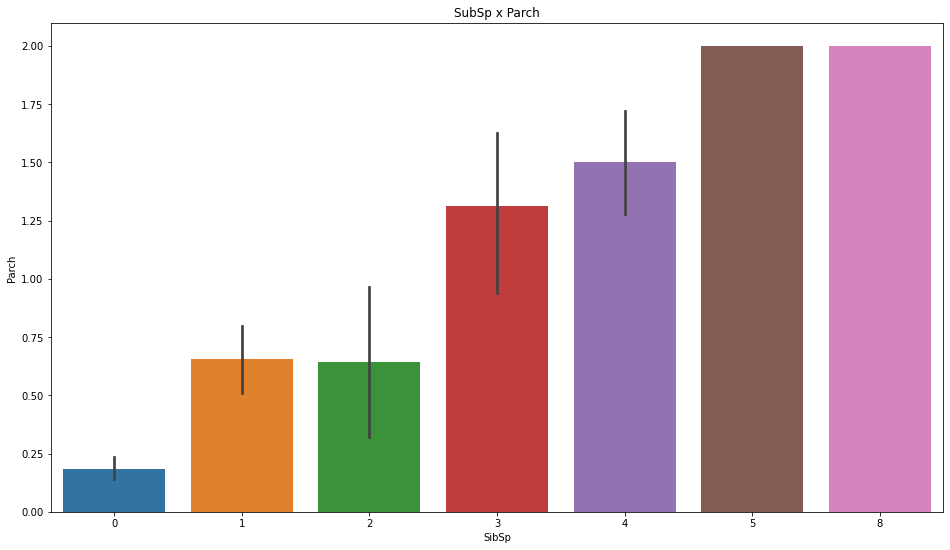

In [11]:
plt.figure(figsize=(16,9))
sns.barplot(x='SibSp', y='Parch', data=df_train)
plt.title('SubSp x Parch')
plt.show()

* Age is inversely proportional to class, maybe the upper class is more elderly than the lower, we'll se it below;


Affirmative. As you can see, the age is inversely proportinal to class.

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


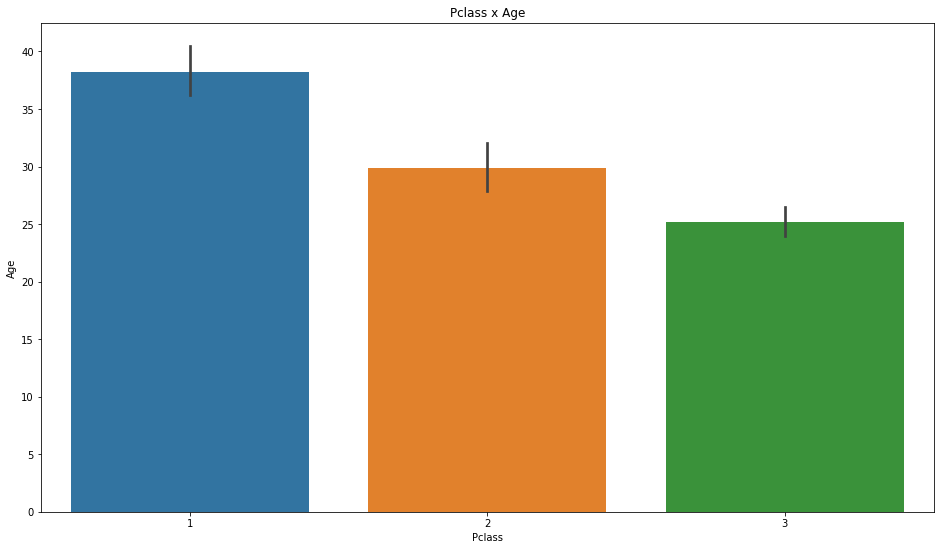

In [12]:
print(df_train.groupby('Pclass').mean()['Age'])
plt.figure(figsize=(16,9))
sns.barplot(x='Pclass', y='Age', data=df_train)
plt.title('Pclass x Age')
plt.show()

Pclass is inverse of Survived, this is alredy expected once the class 1 have 62.96% rate of survived;

As alredy expected.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


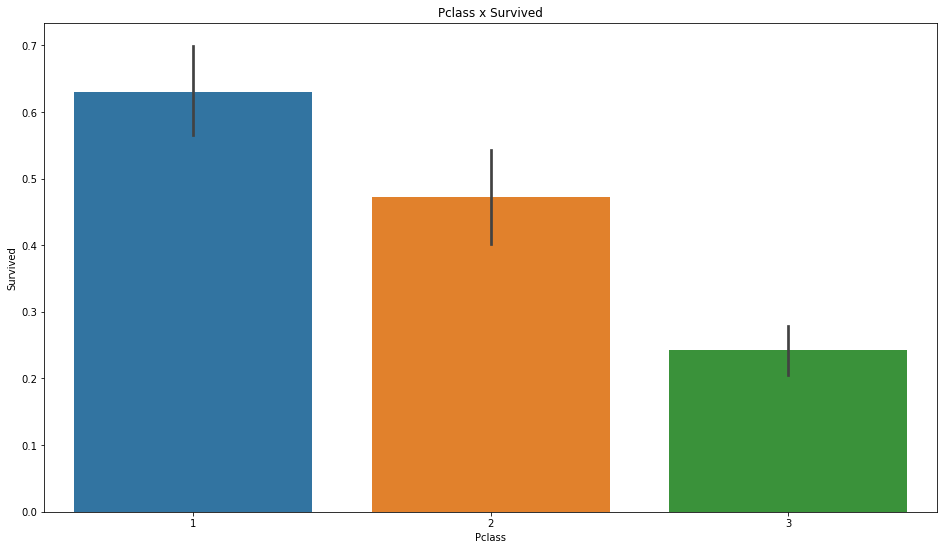

In [13]:
print(df_train.groupby('Pclass').mean()['Survived'])
plt.figure(figsize=(16,9))
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Pclass x Survived')
plt.show()

* Fare is proportional to Survived, maybe who paid more for the trip belong to class 1, thus have more chances to suvive;

Again, yes. But, realize that the columns, Fare and Pclass have strong relationship with Survived. Thus, Who belongs to the upper class or paid more for the trip probably survived.

Pclass  Survived
1       0           64.684008
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64


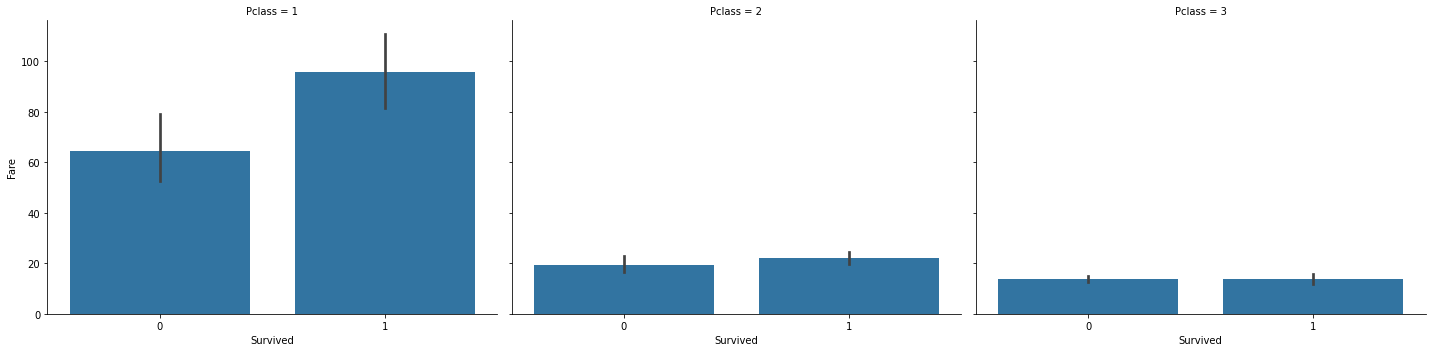

In [14]:
print(df_train.groupby(['Pclass', 'Survived']).mean()['Fare'])
sns.FacetGrid(df_train, col='Pclass', height=5, aspect=4/3).map(sns.barplot, 'Survived', 'Fare', order=[0, 1])
plt.show()

They are very correlated, almost linear, that means that the feature importance is directly related to the outcome. Certainly Pclass and Fare have lot importance for predict who survived. Therefore, our model need to learn this.

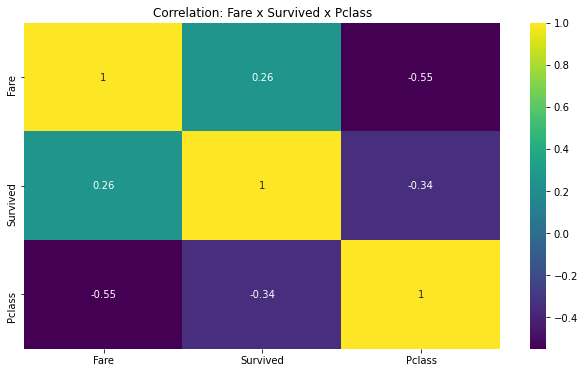

In [15]:
plt.figure(figsize=(16*(2/3),9*(2/3)))
sns.heatmap(df_train[['Fare', 'Survived', 'Pclass']].corr(), cmap='viridis', annot=True)
plt.title('Correlation: Fare x Survived x Pclass')
plt.show()

Also, most of survived is woman (74.20%).

         Survived
Sex              
female  74.203822
male    18.890815


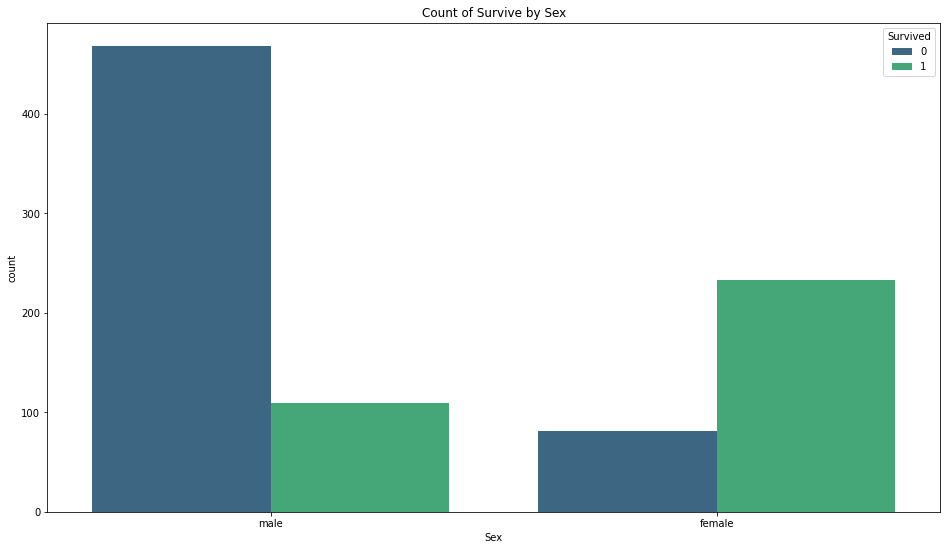

In [16]:
print(df_train.groupby('Sex').mean()[['Survived']]*100)
plt.figure(figsize=(16,9))
sns.countplot(x='Sex', hue='Survived', data=df_train, palette='viridis')
plt.title('Count of Survive by Sex')
plt.show()

## Treating Missing Values

We have to handle with these missing values, let's see this again.

In [17]:
print(df_train.isna().sum(),'\n\n',df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Begin treating the column Embarked.

Let's try to fit the NaN into a Embarked.

In [18]:
df_train[df_train['Embarked'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Using a barplot to vizualize some columns. We can't label the missing data on 'S', 'C' or 'Q'. Let's try other way to do this.

<Figure size 1152x648 with 0 Axes>

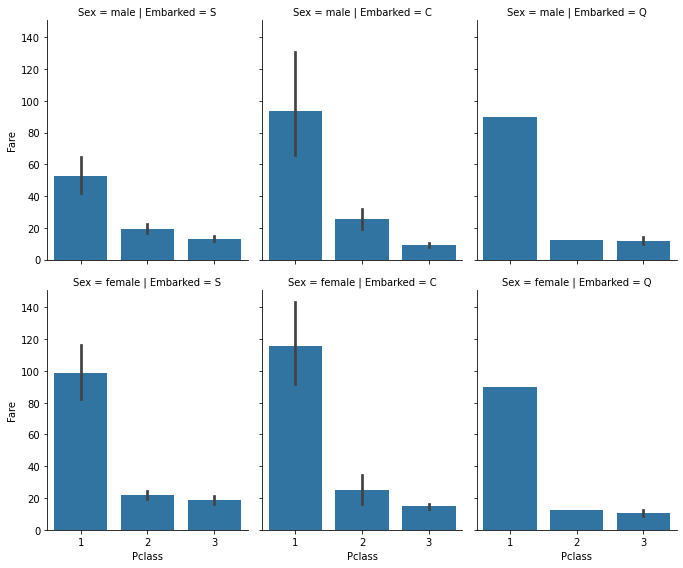

In [19]:
plt.figure(figsize=(16,9))
sns.FacetGrid(df_train, col='Embarked', row='Sex', height=4, aspect=.8).map(sns.barplot, 'Pclass', 'Fare', order=[1, 2, 3])
plt.show()

As you can see below, most of people who embark in the "Q" belong to class 3 and have paid 13.28 $\pm$ 14.18, may the missing data not belong to "Q". But is not possible to go so far, then the missing data values will fit in Embarked "S", because this is more commom than Embarked "C".

In [20]:
df_train.groupby('Embarked').agg(['mean', 'std']).drop('PassengerId', axis=1)

Survived              Pclass                  Age             \
              mean       std      mean       std       mean        std   
Embarked                                                                 
C         0.553571  0.498608  1.886905  0.944100  30.814769  15.434860   
Q         0.389610  0.490860  2.909091  0.369274  28.089286  16.915396   
S         0.336957  0.473037  2.350932  0.789402  29.445397  14.143192   

             SibSp               Parch                 Fare             
              mean       std      mean       std       mean        std  
Embarked                                                                
C         0.386905  0.557213  0.363095  0.660481  59.954144  83.912994  
Q         0.428571  0.979105  0.168831  0.656999  13.276030  14.188047  
S         0.571429  1.216600  0.413043  0.853253  27.079812  35.887993

In [21]:
#For train data
df_train['Embarked'] = df_train['Embarked'].fillna(value='S')

#For test data
df_test['Embarked'] = df_test['Embarked'].fillna(value='S')

Then, apply get_dummies to separete the Embarked colum.

In [22]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

Now, let's handle with Cabin column. Couting the NaN data.

In [23]:
df_train.Cabin.isna().sum()

687

There's some repeated values.

In [24]:
df_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
              ..
A6             1
B80            1
A5             1
E63            1
D28            1
Name: Cabin, Length: 147, dtype: int64

As you can see 77.10% of da Cabin column is missing data and apparently there's no relationship between this column and the Survived, so let's just drop it.

In [25]:
df_train.Cabin.isna().sum() / len(df_train.Cabin) * 100

77.10437710437711

Then, we drop this for train and test data.

In [26]:
#For train and test data
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

Now, we treating the colum Sex using get_dummies.

In [27]:
#for train data
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=True)

#for test data
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)

At leats, let's handle with Age missing data.

Highest class is more elders.

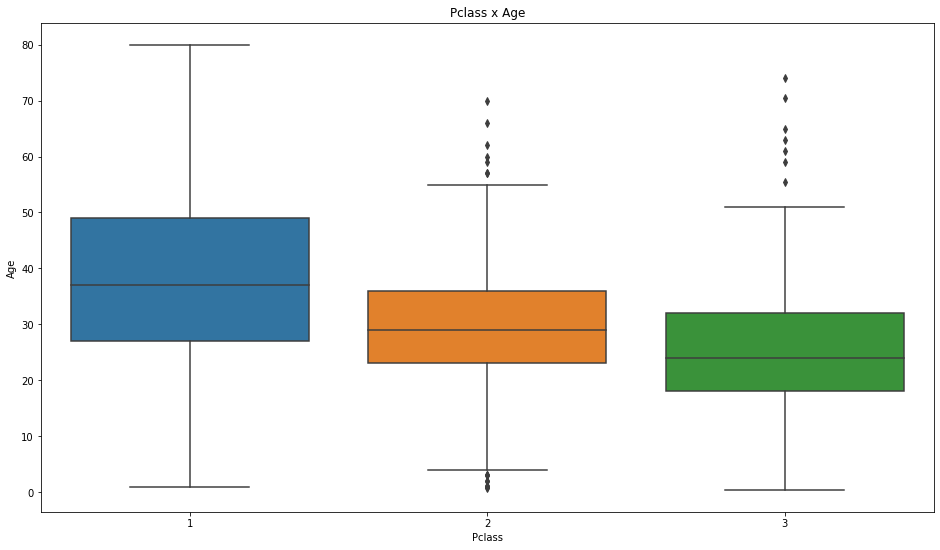

In [28]:
plt.figure(figsize=(16,9))
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.title('Pclass x Age')
plt.show()

To solve missing data problem, let's build up a regression model using Keras from Tensorflow.

But before drop columns of string type.

In [29]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c7ab09050>,
      dtype=object)

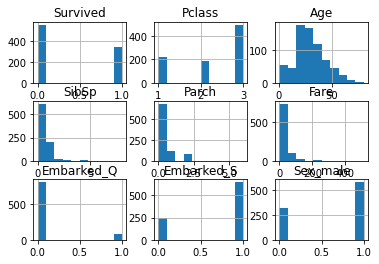

In [30]:
df_train.hist()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Use Normalizer to normalize data, this bring all variable to same range [0,1].

In [32]:
norm = MinMaxScaler()

We use the train DataFrame with not missing data to do regression, then we apply it on de missing values of train and test DataFrame.

In [33]:
df_train_notna = df_train[df_train['Age'].notna() == True].drop(['Survived'], axis=1)

df_X = df_train_notna.drop(['Age'], axis=1)
df_y = df_train_notna['Age']

Split the data into train data and test data.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=72)

Apply normalization into X_train and X_test.

In [35]:
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

Import TensorFlow, for training a deep neural networks to predict the age.

In [36]:
import tensorflow as tf

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[7]),
    #This sequential begin with 10 neurons, the activation is ReLu and the input shape is the number of columns of our training dataset.
    
    tf.keras.layers.BatchNormalization(),
    #Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    
    tf.keras.layers.Dense(15, activation='relu'),
    #Add 15 neurons using ReLu as activation function
    
    tf.keras.layers.Dense(1)
    #The output must be 1 label for a regression model
])

A summary of our model.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 301
Trainable params: 281
Non-trainable params: 20
_________________________________________________________________


* SGD, stochastic gradient descent, optimizer is a method used to minimize the cost fuction;
* Mean squared logarithmic error, MSLE is a function that measure the ration between the true and predict values;
* The metrics accuracy and MSE(Mean Squared Error) measure the behavior of test and validation data along the fitting;
* EarlyStopping is a callback used to avoid overfitting of the data;

In [39]:
model.compile(optimizer='SGD',loss='mean_squared_logarithmic_error',metrics=['accuracy', 'MSE'])
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_train, y_train), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss'))

Epoch 1/1000
18/18 [==============================] - 0s 13ms/step - loss: 8.3824 - accuracy: 0.0000e+00 - MSE: 1091.7380 - val_loss: 5.8841 - val_accuracy: 0.0053 - val_MSE: 1018.7649
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5142 - accuracy: 0.0035 - MSE: 1014.2921 - val_loss: 4.2243 - val_accuracy: 0.0053 - val_MSE: 943.7316
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.7525 - accuracy: 0.0035 - MSE: 945.5588 - val_loss: 3.3476 - val_accuracy: 0.0053 - val_MSE: 879.8864
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2672 - accuracy: 0.0035 - MSE: 887.3057 - val_loss: 2.8724 - val_accuracy: 0.0053 - val_MSE: 830.1240
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6865 - accuracy: 0.0035 - MSE: 824.8694 - val_loss: 2.3384 - val_accuracy: 0.0053 - val_MSE: 779.0980
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0710 - accuracy: 0.0035 - 

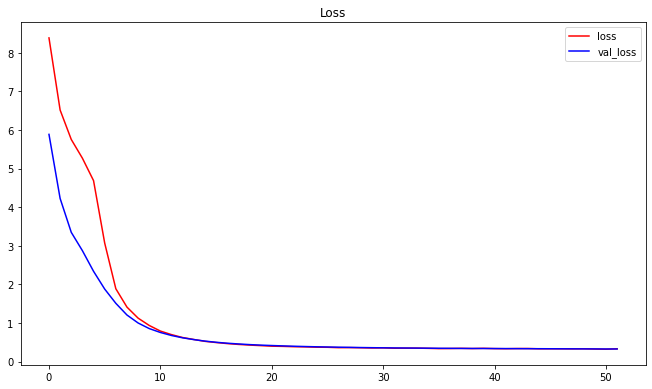

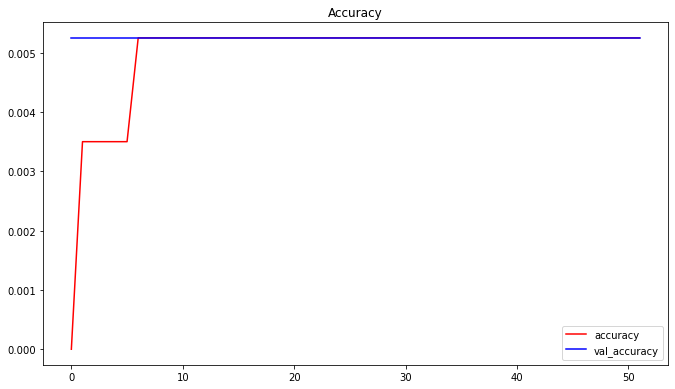

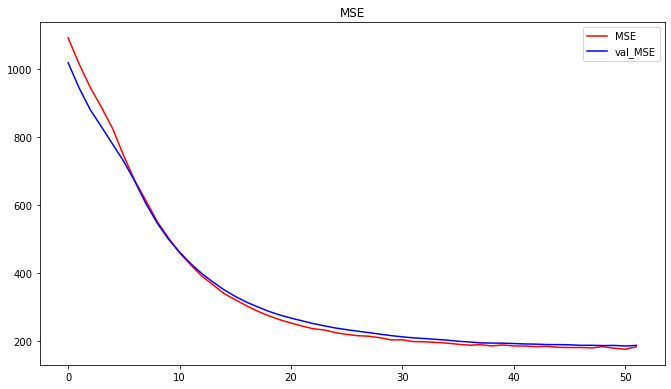

In [40]:
plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['accuracy'], 'r', label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['MSE'], 'r', label='MSE')
plt.plot(history.history['val_MSE'], 'b', label='val_MSE')
plt.title('MSE')
plt.legend()
plt.show()

This is a little bad, but is the best that we have. There's three ways to continue, use this regreesion for age on the missing data, use mean age to fill them or delete them. At the end of the notebook we'll try these three ways to handle with this, but now with notebook using regression.

Correlation Matrix:
[[1.         0.44636493]
 [0.44636493 1.        ]]


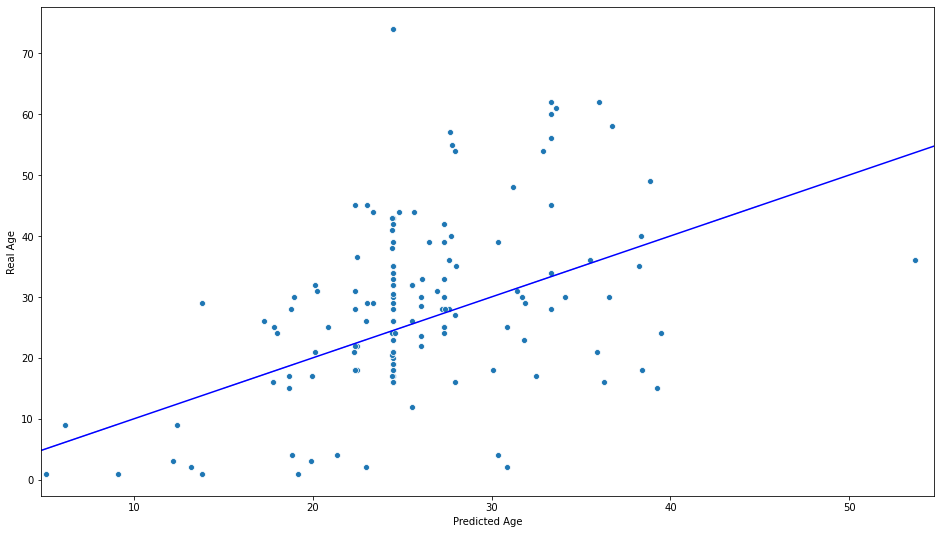

In [41]:
classifications = model.predict(X_test)
print(f'Correlation Matrix:\n{np.corrcoef(classifications[:,0], y_test)}')
plt.figure(figsize=(16,9))
sns.scatterplot(x = classifications[:,0], y = y_test)
sns.lineplot(x = y_test, y = y_test, color='b')
plt.xlim(.94*min(classifications[:,0]), 1.02*max(classifications[:,0]))
plt.xlabel('Predicted Age')
plt.ylabel('Real Age')
plt.show()

Then, we apply our model into our train and test data.

In [42]:
df_train['Age'] = df_train['Age'].replace({np.nan: np.array(model.predict(norm.fit_transform(df_train.drop(['Age', 'Survived'], axis=1))))})
df_test['Age'] = df_test['Age'].replace({np.nan: np.array(model.predict(norm.fit_transform(df_test.drop(['Age'], axis=1))))})

In [43]:
print(df_train.isna().sum(),'\n\n',df_test.isna().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64 

 Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64


Let's just use mean values on the Fare missing data.

In [44]:
df_test['Fare'] = df_test['Fare'].fillna((df_test.Fare.mean()))
df_train['Fare'] = df_train['Fare'].fillna((df_train.Fare.mean()))

## Modelling Deep Neural Network for Predict Survival

We begin sorting out train and test data.

In [45]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']
X_test = df_test

Normalizing data.

In [46]:
norm = MinMaxScaler()
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

Let's build model using keras.

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[8]),
    #This sequential begin with 10 neurons, the activation is ReLu and the input shape is the number of columns of our training dataset.
    
    tf.keras.layers.BatchNormalization(),
    #Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    
    tf.keras.layers.Dense(14, activation='relu'),
    #Add 14 neurons using ReLu as activation function
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    #The output must be 1 label and de activation is a sigmoid function for binary classification
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 14)                154       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 15        
Total params: 299
Trainable params: 279
Non-trainable params: 20
_________________________________________________________________


* Binary crossentropy is a loss function/
* SGD, stochastic gradient descent, optimizer is a method used to minimize the cost fuction;
* The metrics accuracy and MSE(Mean Squared Error) measure the behavior of test and validation data along the fitting;
* EarlyStopping is a callback used to avoid overfitting of the data monitoring the value of loss;

In [49]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),metrics=['accuracy', 'MSE'])
history = model.fit(X_train, y_train, epochs=1000, validation_split=.2, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss'))

Epoch 1/1000
23/23 [==============================] - 0s 8ms/step - loss: 0.7356 - accuracy: 0.4438 - MSE: 0.2701 - val_loss: 0.7163 - val_accuracy: 0.3855 - val_MSE: 0.2615
Epoch 2/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.4410 - MSE: 0.2693 - val_loss: 0.7087 - val_accuracy: 0.3911 - val_MSE: 0.2578
Epoch 3/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.4508 - MSE: 0.2622 - val_loss: 0.7014 - val_accuracy: 0.3743 - val_MSE: 0.2541
Epoch 4/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.4803 - MSE: 0.2587 - val_loss: 0.6937 - val_accuracy: 0.3799 - val_MSE: 0.2503
Epoch 5/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4916 - MSE: 0.2530 - val_loss: 0.6865 - val_accuracy: 0.5978 - val_MSE: 0.2467
Epoch 6/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5070 - MSE: 0.2482 - val_loss: 0.67

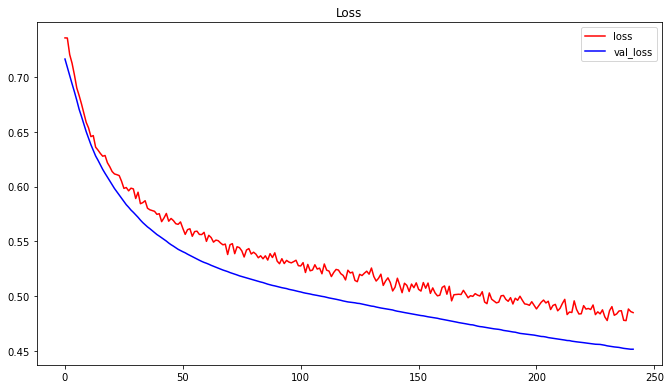

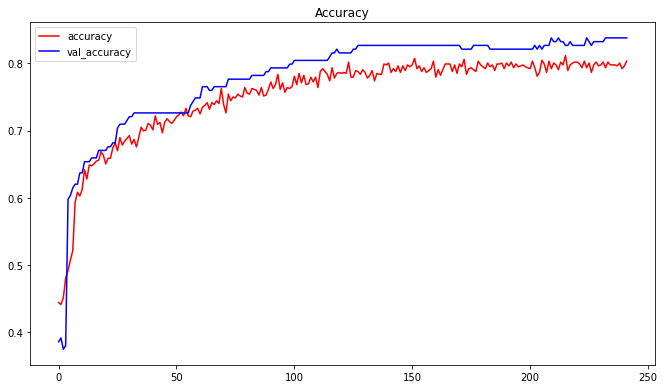

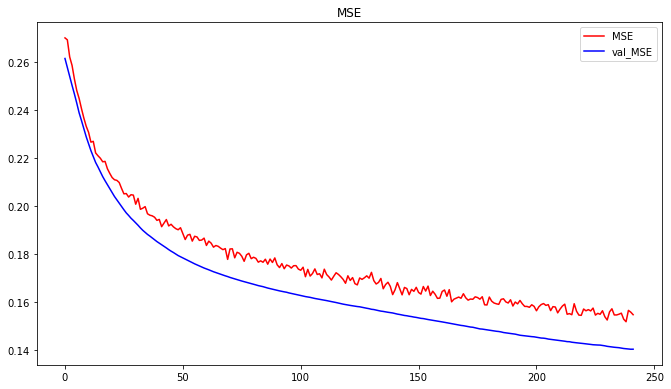

In [50]:
plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['accuracy'], 'r', label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(16*.7,9*.7))
plt.plot(history.history['MSE'], 'r', label='MSE')
plt.plot(history.history['val_MSE'], 'b', label='val_MSE')
plt.title('MSE')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
classifications = model.predict(X_train)
for i, ival in enumerate(classifications):
    if ival >= 0.5: classifications[i] = 1
    else: classifications[i] = 0
print(f'Correlation Matrix:\n{np.corrcoef(classifications[:,0], y_train)}\n\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_train, classifications)}\n\n')
print(f'Accuracy Matrix:\n{accuracy_score(y_train, classifications)}')

Correlation Matrix:
[[1.         0.59291357]
 [0.59291357 1.        ]]


Confusion Matrix:
[[508  41]
 [128 214]]


Accuracy Matrix:
0.8103254769921436


In [53]:
df_test_X = norm.fit_transform(df_test)
df_test_y = model.predict(df_test_X)
for i, ival in enumerate(df_test_y):
    if ival >= 0.5: df_test_y[i] = 1
    else: df_test_y[i] = 0

In [54]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = df_test_y.astype(int)
submission.to_csv('TitanicKNN.csv')

## Baselines

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
X_test.shape, y_test.shape, X_test.shape

((418, 8), (143,), (418, 8))